In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [176]:
file_path = 'E:/UNCC/UNCC ML/Housing.csv'
sample = pd.DataFrame(pd.read_csv(file_path))
sample.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [177]:
# Converting the strings to values

list1 =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
list2 = ['furnishingstatus']

# Defining the map function
def map1(x):
    return x.map({'yes': 1, 'no': 0})

def map2(x):
    return x.map({'furnished': 1, 'semi-furnished': 0})
    
sample[list1] = sample[list1].apply(map1)
sample[list2] = sample[list2].apply(map2)

sample.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.0


In [178]:
sample1 = sample[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
sample1.head(3)

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2


In [179]:
from sklearn.model_selection import train_test_split

# Splitting the training and validation sets.
np.random.seed(0)
df_train, df_test = train_test_split(sample1, train_size = 0.8, test_size = 0.2, random_state = 100)
y_train = df_train.pop('price')
X_train = df_train
y_val = df_test.pop('price')
X_test = df_test

In [180]:
# Creating the numpy arrays.
X_p1_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_p1_val = np.c_[np.ones((len(X_test), 1)), X_test]

y_p1_train = y_train.to_numpy()
y_p1_val = y_val.to_numpy()


train_losses = []
val_losses = []

In [181]:
# Setting the values for gradient desent calculation.
learning_rate = 0.01
iterations = 100
m = len(y_train)
n = len(y_val)
w = np.zeros(X_p1_train.shape[1])

In [182]:
# The calculation loop for weights and losses
for i in range(iterations):
    gradient = (2/m) * X_p1_train.T.dot(X_p1_train.dot(w) - y_p1_train)

    w -= learning_rate * gradient
    print(f'The values of the weights: {w}')
    
    train_loss = (1/m) * np.sum(np.square(X_p1_train.dot(w) - y_p1_train))
    val_loss = (1/n) * np.sum(np.square(X_p1_val.dot(w) - y_p1_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

#print(f'The values of the weights: {w}')

The values of the weights: [9.59145844e+05 5.35955061e+09 2.91723960e+06 1.33935797e+06
 1.87908957e+06 8.13413936e+05]
The values of the weights: [-5.51532291e+12 -3.33267143e+16 -1.64455020e+13 -7.33876284e+12
 -1.01626838e+13 -4.70723264e+12]
The values of the weights: [3.42953408e+19 2.07231929e+23 1.02261301e+20 4.56338424e+19
 6.31935277e+19 2.92704799e+19]
The values of the weights: [-2.13255035e+26 -1.28860805e+30 -6.35880467e+26 -2.83760022e+26
 -3.92949527e+26 -1.82009482e+26]
The values of the weights: [1.32606088e+33 8.01281304e+36 3.95402722e+33 1.76447447e+33
 2.44343585e+33 1.13177001e+33]
The values of the weights: [-8.24570198e+39 -4.98252148e+43 -2.45869029e+40 -1.09718421e+40
 -1.51937547e+40 -7.03756394e+39]
The values of the weights: [5.12733631e+46 3.09822783e+50 1.52886098e+47 6.82250276e+46
 9.44776934e+46 4.37609281e+46]
The values of the weights: [-3.18827648e+53 -1.92653774e+57 -9.50675203e+53 -4.24236363e+53
 -5.87480495e+53 -2.72113880e+53]
The values of th

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19420\3486592420.py:8: RuntimeWarning: overflow encountered in square
  train_loss = (1/m) * np.sum(np.square(X_p1_train.dot(w) - y_p1_train))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19420\3486592420.py:9: RuntimeWarning: overflow encountered in square
  val_loss = (1/n) * np.sum(np.square(X_p1_val.dot(w) - y_p1_val))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19420\3486592420.py:5: RuntimeWarning: invalid value encountered in subtract
  w -= learning_rate * gradient


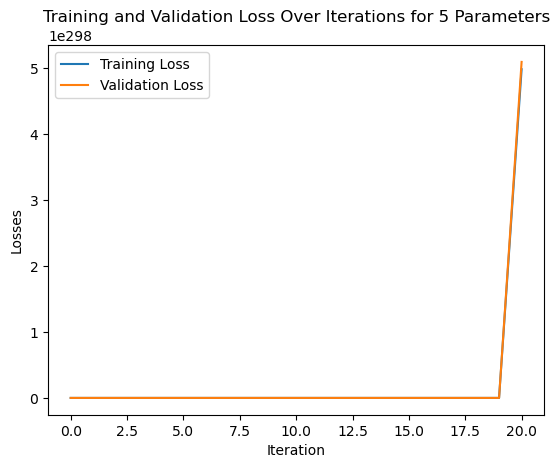

In [183]:
# Plotting the training and validation losses
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Losses")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for 5 Parameters")
plt.show()

In [184]:
# Preparing the second sample with more parameters.
sample2 = sample[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                  'parking', 'prefarea']]
sample2.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1


In [185]:
from sklearn.model_selection import train_test_split

# Splitting the training and validation sets.
np.random.seed(0)
df_train, df_test = train_test_split(sample2, train_size = 0.8, test_size = 0.2, random_state = 100)
y_train = df_train.pop('price')
X_train = df_train
y_val = df_test.pop('price')
X_test = df_test

In [186]:
# Creating the numpy arrays.
X_p1_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_p1_val = np.c_[np.ones((len(X_test), 1)), X_test]

y_p1_train = y_train.to_numpy()
y_p1_val = y_val.to_numpy()


train_losses = []
val_losses = []

In [187]:
# Setting the values for gradient desent calculation.
learning_rate = 0.01
iterations = 100
m = len(y_train)
n = len(y_val)
w = np.zeros(X_p1_train.shape[1])

In [188]:
# The calculation loop for weights and losses
for i in range(iterations):
    gradient = (2/m) * X_p1_train.T.dot(X_p1_train.dot(w) - y_p1_train)

    w -= learning_rate * gradient

    train_loss = (1/m) * np.sum(np.square(X_p1_train.dot(w) - y_p1_train))
    val_loss = (1/n) * np.sum(np.square(X_p1_val.dot(w) - y_p1_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19420\768624025.py:7: RuntimeWarning: overflow encountered in square
  train_loss = (1/m) * np.sum(np.square(X_p1_train.dot(w) - y_p1_train))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19420\768624025.py:8: RuntimeWarning: overflow encountered in square
  val_loss = (1/n) * np.sum(np.square(X_p1_val.dot(w) - y_p1_val))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19420\768624025.py:5: RuntimeWarning: invalid value encountered in subtract
  w -= learning_rate * gradient


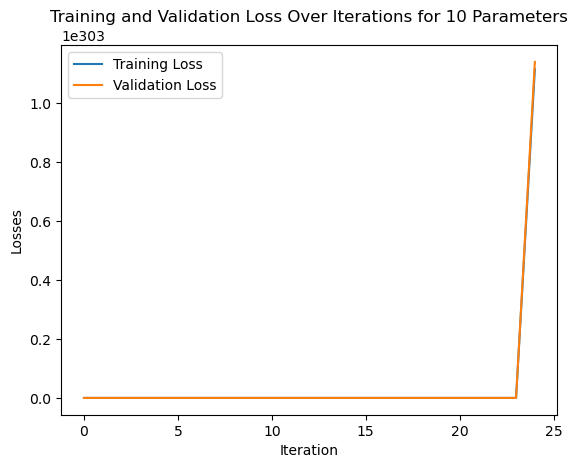

In [189]:
# Plotting the training and validation losses
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Losses")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for 10 Parameters")
plt.show()